In [1]:
import pandas as pd

In [ ]:
path = "../../Elliptic_plusplus"

In [68]:
df_txs_feats = pd.read_csv(f"{path}/txs_features.csv")
df_addr_tx_edges = pd.read_csv(f"{path}/AddrTx_edgelist.csv")
df_tx_addr_edges = pd.read_csv(f"{path}/TxAddr_edgelist.csv")
df_addr_labels = pd.read_csv(f"{path}/wallets_classes.csv")

In [78]:
# Exclude wallets with label = "unknown" from both tx_addr and addr_tx edges
known_wallets = df_addr_labels[df_addr_labels["class"] != 3]["address"].unique()
df_addr_tx_edges = df_addr_tx_edges[df_addr_tx_edges["input_address"].isin(known_wallets)]
df_tx_addr_edges = df_tx_addr_edges[df_tx_addr_edges["output_address"].isin(known_wallets)]
len(known_wallets)

265354

In [79]:
# Combine addr_tx and tx_addr to [input_address, output_address, txId]
merged = df_addr_tx_edges.merge(df_tx_addr_edges, on="txId", how="inner")
merged.head()

,input_address,txId,output_address
0,15qDzZLrcqQMUh5WnXaHTa4B3kreqAKi36,230325162,1E3QGYRS4TQ4FxVhC7FivRXSQHWPaVqSnA
1,1HYPEj9ZfUCsoYtbULhH2WyHtBgL3w8MTV,230325162,1E3QGYRS4TQ4FxVhC7FivRXSQHWPaVqSnA
2,1JxxNbdHgxwXLw19krxUotkWETLQzGmUFD,230325162,1E3QGYRS4TQ4FxVhC7FivRXSQHWPaVqSnA
3,19u9iAQhMxRLE8Unksy2xJPawXrxgdsrnv,230325162,1E3QGYRS4TQ4FxVhC7FivRXSQHWPaVqSnA
4,1DN3MfRt6M4dm5DepeDeFfZvbLL45vtn6P,230325162,1E3QGYRS4TQ4FxVhC7FivRXSQHWPaVqSnA


Try getting all transactions for an address and check if they appear in different timesteps 

In [80]:
timesteps = merged.merge(df_txs_feats[["txId", "Time step"]], on="txId", how="inner")

In [81]:
wallets = pd.concat([
    timesteps[["input_address", "Time step"]].rename(columns={"input_address": "wallet_address"}),
    timesteps[["output_address", "Time step"]].rename(columns={"output_address": "wallet_address"})
])

In [82]:
wallets = wallets.drop_duplicates().sort_values(by=["wallet_address", "Time step"])

In [97]:
wallet_counts = wallets.groupby("wallet_address").count().reset_index().rename(columns={"Time step": "n_steps"})
wallet_counts

,wallet_address,n_steps
0,111112TykSw72ztDN2WJger4cynzWYC5w,1
1,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,1
2,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,1
3,1117wASFaYgJJP6MiY8cPD5DMdQda8gDZ,1
4,111ECNFEjJsQJ6LkAsAESBGTHBvZE66oX,1
...,...,...
248138,3R2KQxz2Uk7xF9bfDGffTn52NrfnBjdaLy,1
248139,3R2LAgPtnjeU2XdyR1GUXaTzKmh81VETYm,1
248140,3R2SZEK2UggNm1ntkXTe8eoea11sxg9vjw,1
248141,3R2TfX1PDN93SHbDXZqYPCn1cgmCeLMBra,1


In [98]:
multi_ts_wallets = wallet_counts[wallet_counts["n_steps"] > 1]
multi_ts_wallets

,wallet_address,n_steps
9,111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw,2
10,1121A3vrYYduVPMnfS87ieHFP2bwy6xriv,2
31,11287dmR4AcCWg8g8jfnPHLN39gmmpeNrQ,3
46,112EFmY89R1cFdvoAuxMXdG9Y6Kr6jcLkW,2
68,112NwLpiew25AJNXkvKRNxtRjqX4KETrhJ,2
...,...,...
248095,3QzYZEqiaEcp5KwstzjQJpKX7kJHdNEn7N,2
248098,3QzfHJdU9owYvFifwUADvBkrL2JX6V8NMu,6
248100,3QzsATJ5LHEzRhxmBBcPBZGLzr23fdGUZY,2
248102,3QzsUcoWLgcWTrr2HTv2i1Q6kLHqHCZmwM,2


In [108]:
len(multi_ts_wallets) / len(wallet_counts)

0.05417843743325421

In [99]:
wallet_counts["n_steps"].describe(), len(wallet_counts)

(count    248143.000000
 mean          1.090371
 std           0.563855
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max          47.000000
 Name: n_steps, dtype: float64,
 248143)

(array([2.43923e+05, 2.24200e+03, 1.54700e+03, 2.44000e+02, 5.20000e+01,
        2.80000e+01, 6.00000e+00, 6.00000e+00, 1.90000e+01, 1.20000e+01,
        4.00000e+00, 1.80000e+01, 1.20000e+01, 5.00000e+00, 5.00000e+00,
        4.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 1.        ,  2.35294118,  3.70588235,  5.05882353,  6.41176471,
         7.76470588,  9.11764706, 10.47058824, 11.82352941, 13.17647059,
        14.52941176, 15.88235294, 17.23529412, 18.58823529, 19.94117647,
        21.29411765, 22.64705882, 24.        , 25.35294118, 26.70588235,
        28.05882353, 29.41176471, 30.76470588, 32.11764706, 33.47058824,
        34.82352941, 36.17647059, 37.52941176, 38.88235294, 40.23529412,
        41.58823529, 42.94117647, 44.29411765, 45.64705882, 47

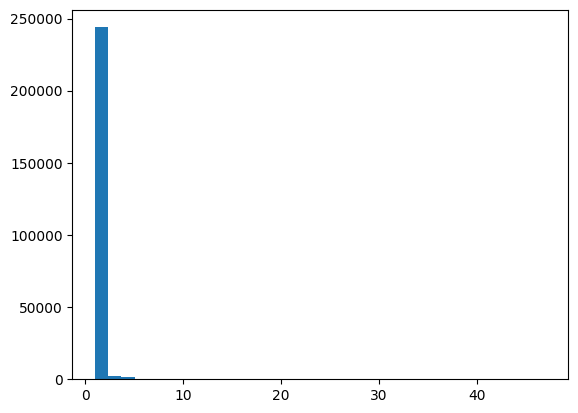

In [107]:
import matplotlib.pyplot as plt
plt.hist(wallet_counts["n_steps"], bins=wallet_counts["n_steps"].nunique())